In [1]:
import pretty_midi
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from torch import 
import os
import IPython.display as ipd
import seaborn as sns

In [2]:
dir = 'C:/Users/RaghulKrish/Desktop/Projects/AC_DC_Music/MIDI_Ext/Back_In_Black.mid'
midi_sample = pretty_midi.PrettyMIDI(dir)
Fs = 22050
# audio_data = midi_sample.synthesize(fs=Fs)
# ipd.Audio(audio_data, rate=Fs)

c:\Users\RaghulKrish\AppData\Local\Programs\Python\Python310\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [19]:
smaple_notes = []
ins = midi_sample.instruments

for inst in ins:
    for no in inst.notes:
        smaple_notes.append([no.start, no.end, no.pitch, no.velocity])

In [21]:
smaple_notes = pd.DataFrame(smaple_notes, columns=['Start', 'End', 'Pitch', 'Velocity'])

In [22]:
smaple_notes

,Start,End,Pitch,Velocity
0,2.531644,3.164555,52,127
1,2.531644,3.164555,52,80
2,2.531644,3.164555,47,127
3,2.531644,3.164555,64,32
4,2.531644,3.164555,64,127
...,...,...,...,...
10813,188.291022,188.501993,71,118
10814,187.658112,188.923934,69,118
10815,188.607478,188.923934,75,118
10816,189.082161,189.398617,71,118


In [5]:
for inst in ins:
    print(inst.notes)

[Note(start=2.531644, end=3.164555, pitch=52, velocity=127), Note(start=2.531644, end=3.164555, pitch=52, velocity=80), Note(start=2.531644, end=3.164555, pitch=47, velocity=127), Note(start=2.531644, end=3.164555, pitch=64, velocity=32), Note(start=2.531644, end=3.164555, pitch=64, velocity=127), Note(start=2.531644, end=3.164555, pitch=56, velocity=127), Note(start=2.531644, end=3.164555, pitch=40, velocity=80), Note(start=2.531644, end=3.164555, pitch=59, velocity=127), Note(start=2.531644, end=3.164555, pitch=59, velocity=127), Note(start=2.531644, end=3.164555, pitch=76, velocity=32), Note(start=2.531644, end=3.164555, pitch=71, velocity=127), Note(start=2.531644, end=3.164555, pitch=68, velocity=127), Note(start=3.481011, end=3.639238, pitch=50, velocity=127), Note(start=3.481011, end=3.639238, pitch=62, velocity=127), Note(start=3.481011, end=3.639238, pitch=62, velocity=127), Note(start=3.481011, end=3.639238, pitch=57, velocity=127), Note(start=3.481011, end=3.639238, pitch=66

In [4]:
print(len(smaple_notes))

10818


In [29]:
# Midi files location
midi_files_dir = 'C:/Users/RaghulKrish/Desktop/Projects/AC_DC_Music/MIDI_Ext'

def ext_notes(file_name, midi_dat):
    notes = []
    for instruments in midi_dat.instruments:
        # print(instruments.notes)
        for note in instruments.notes:
            notes.append([note.start, note.end, note.pitch, note.velocity])
            # print(note)
    return pd.DataFrame(notes, columns=['Start', 'End', 'Pitch', 'Velocity'])
    # return notes

df = pd.DataFrame(columns=['Start', 'End', 'Pitch', 'Velocity'])
for file_name in os.listdir(midi_files_dir):
    # print(file_name)
    if file_name.endswith('.mid'):
        path = os.path.join(midi_files_dir, file_name)

        # Load midi data
        midi_data = pretty_midi.PrettyMIDI(path)

        # Extract notes from midi data
        df = df.append(ext_notes(file_name, midi_data))


c:\Users\RaghulKrish\AppData\Local\Programs\Python\Python310\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
C:\Users\RaghulKrish\AppData\Local\Temp\ipykernel_18160\900327955.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ext_notes(file_name, midi_data))
C:\Users\RaghulKrish\AppData\Local\Temp\ipykernel_18160\900327955.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ext_notes(file_name, midi_data))
C:\Users\RaghulKrish\AppData\Local\Temp\ipykernel_18160\900327955.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [30]:
df.shape

(169786, 4)

In [33]:
df.head()

,Start,End,Pitch,Velocity
0,2.531644,3.164555,52,127
1,2.531644,3.164555,52,80
2,2.531644,3.164555,47,127
3,2.531644,3.164555,64,32
4,2.531644,3.164555,64,127


In [46]:
df['Pitch'] = df['Pitch'].astype(float)

df['Velocity'] = df['Velocity'].astype(float)

In [47]:
df.describe()

,Start,End,Pitch,Velocity
count,169786.000000,169786.000000,169786.000000,169786.000000
mean,142.706025,142.987222,46.949366,102.550204
std,84.104448,84.117218,12.194330,20.024448
min,0.000000,0.001149,15.000000,1.000000
25%,73.500000,73.750000,38.000000,100.000000
50%,135.341231,135.649976,46.000000,100.000000
75%,202.222020,202.492975,55.000000,120.000000
max,354.397794,359.058990,100.000000,127.000000


In [52]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 4, 1)
  sns.histplot(notes, x="Pitch", bins=20)

  plt.subplot(1, 4, 2)
  max_step = np.percentile(notes['Velocity'], 100 - drop_percentile)
  sns.histplot(notes, x="Velocity", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 4, 3)
  max_duration = np.percentile(notes['Start'], 100 - drop_percentile)
  sns.histplot(notes, x="Start", bins=np.linspace(0, max_duration, 21))

  plt.subplot(1, 4, 4)
  max_duration = np.percentile(notes['End'], 100 - drop_percentile)
  sns.histplot(notes, x="End", bins=np.linspace(0, max_duration, 21))

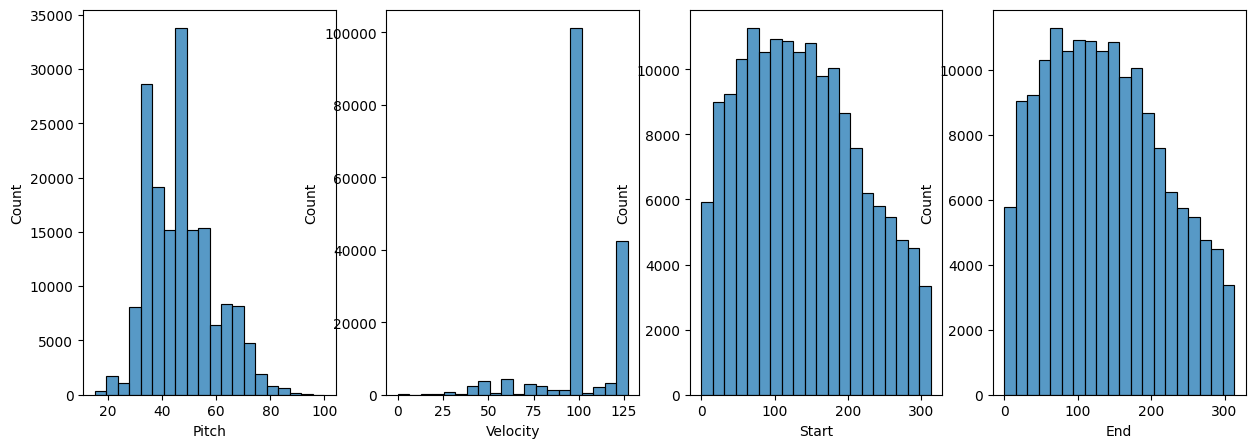

In [53]:
plot_distributions(df)